<a href="https://colab.research.google.com/github/Alyxx-The-Sniper/Deep_learning_sample/blob/main/Transfer_Learning_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About This Project

The primary objective of this project is to utilize the power of pre-trained models to build neural networks in PyTorch. Throughout the project, we will leverage existing models to expedite our development process. It is assumed that readers are already familiar with Python coding, specifically modular code scripts, which will be extensively utilized. This will allow us to focus on interpreting and analyzing the performance of the models.

We will delve into the architecture of the EfficientNet pre-trained model as our main focus. Our aim is to understand its architectural design and learn how to fine-tune it for specific tasks. However, it's worth noting that there are numerous other pre-trained models available, such as ResNet, VGG, and Inception V3, among others, which we can freely explore and compare with the EfficientNet model.

To evaluate the performance of our model, we will plot loss curves to visualize the training progress and generate a confusion matrix to analyze the results of classification. Additionally, we will test our model by predicting the labels of custom images.

By the end of this project, you will have gained practical experience in building neural networks using pre-trained models in PyTorch. This knowledge will enable you to effectively interpret and analyze results, empowering you to confidently approach similar deep learning tasks in the future. So, let's embark on this exciting journey of exploring pre-trained models and making predictions on custom images!

#### Transfer Learning

Transfer learning is a machine learning technique that involves leveraging knowledge gained from training one model on a specific task and applying it to a different but related task. Instead of starting from scratch, transfer learning allows us to use pre-trained models that have been trained on large datasets for tasks like image classification, object detection, or natural language processing.

The idea behind transfer learning is that the features learned by a model while solving one task can be useful for solving another related task. By using a pre-trained model as a starting point, we can save time and computational resources. We typically remove the last few layers of the pre-trained model and replace them with new layers that are specifically designed for our target task. These new layers are then trained on a smaller, task-specific dataset.

#### Where to find pretrained models?

1. Pytorch Domain Libraries
    - torchvision.models, torchtext.models, torchaudio.models, torchrec.models
2. HuggingFace Hub
    - https://huggingface.co/models
3. timm (PyTorch Image Models) library
    - https://github.com/rwightman/pytorch-image-models
4. Paperswithcode
    - https://paperswithcode.com/

#### Instructions: 
To get started with this project, we will be utilizing Google Drive and Google Colab. Our datasets, Python modular scripts, and helper functions are stored in Google Drive. Before proceeding, it is necessary to download these resources.


Link to the resources: [my_google_drive](https://drive.google.com/drive/folders/1YTCmrLvM9KQe1ULUMM1sDxk9uQVfNf_B?usp=drive_link)

> Here is a step-by-step guide to downloading the required files:

 1. Access the necessary resources by downloading the files from the provided link and save them in your Google Drive.
 2. Open Google Colab and click on the folder icon labeled 'Files' in the upper left corner of the screen. This will give you access to the file browser.
 3. Locate the 'Mount Drive' option in Google Colab to establish a connection with your Google Drive storage. Follow the prompts to authenticate and grant access permissions.
 4. Once your Google Drive is successfully mounted, you can navigate to the location where you saved the resources files. You can now work with these files directly in Google Colab.

Please note that if you need to copy the resources to a specific location or make any adjustments to the source and destination paths based on your configuration style, you should use the 'copy' method from the 'shutil' module. This assumes you have prior knowledge of how to effectively use this method.

Now that you have downloaded the necessary resources and set up Google Colab, you are ready to begin working on the project. Enjoy exploring and building neural networks with the convenience of Google Drive and Google Colab!  



---


# Get Data / Set-up


#### Copying the necessary resources

In [1]:
import shutil
from shutil import copy

def copy_drive_script(source_file_path: str, destination_file_path: str):
  copy(source_file_path, destination_file_path)
  print("File copied successfully!")

source = ['/content/drive/MyDrive/Deep_learning/get_data.py',
          '/content/drive/MyDrive/Deep_learning/data_setup.py',
          # '/content/drive/MyDrive/Deep_learning/model_builder.py',
          '/content/drive/MyDrive/Deep_learning/engine.py',
          # '/content/drive/MyDrive/Deep_learning/utils.py',
          # '/content/drive/MyDrive/Deep_learning/train.py',
          # '/content/drive/MyDrive/Deep_learning/predict.py',
          "/content/drive/MyDrive/Deep_learning/helper_functions.py"]

destination = ['get_data.py', 
               'data_setup.py',
              #  'model_builder.py', 
               'engine.py', 
              #  'utils.py', 
              #  'train.py', 
              #  'predict.py', 
               "helper_functions.py"] 

for src, dest in zip(source, destination):
    copy(src, dest)
    print ('File copied successfully!')

File copied successfully!
File copied successfully!
File copied successfully!
File copied successfully!


Using the `get_data.py` script, we will copy the files containing the sample images from Google Drive to Google Colab. The downloaded files are already organized in a standard image classification format.

The `get_data.py` script accepts two arguments, `food_list` and `copy_percentage`, which allow us to specify the list of food categories and the percentage of images to download, respectively.

In [2]:
!python get_data.py --food_list 'cup_cakes,donuts,french_fries,ice_cream' --copy_percentage 0.1

[INFO] Copying 0.1 percent of ['cup_cakes', 'donuts', 'french_fries', 'ice_cream']
100%|███████████████████████████████████████████| 75/75 [00:15<00:00,  4.80it/s]
Download Complete


####Create directory paths for, data, my_fav_foods, and the train/test directories."

In [3]:
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "my_fav_foods"
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

Setup device agnostic code

In [4]:
import torch
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### Transform
> When using a pre-trained model, it is important to ensure that our custom data is prepared in the same manner as the original training data used for the model.

In this project, we will utilize the pre-trained model EfficientNet_B0. To align our dataset with the transformation requirements of this model, we will make use of the EfficientNet_B0_Weights architecture from torchvision.models. This will enable us to preprocess our data in a manner consistent with the pre-trained model's expectations.

Manual method (Customizable)

In [5]:
from torchvision import transforms
# Create a transforms pipeline manually (required for torchvision < 0.13)
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])
manual_transforms

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

Auto transform

In [6]:
import torchvision
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [7]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


Notice how auto_transforms is very similar to manual_transforms, the only difference is that auto_transforms came with the model architecture we chose, where as we had to create manual_transforms by hand.

The benefit of automatically creating a transform through weights.transforms() is that you ensure you're using the same data transformation as the pretrained model used when it was trained.

However, the tradeoff of using automatically created transforms is a lack of customization.

>We will use auto_transforms to create DataLoaders with data_setup.py script

#### Dataloader (using data_setup.py)

In [8]:
# Create training and testing DataLoaders as well as get a list of class names
import data_setup
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f4f8494b3a0>,
 ['cup_cakes', 'donuts', 'french_fries', 'ice_cream'])

# Getting/Create a Pretrained Model
The whole idea of transfer learning is to take an already well-performing model on a problem-space similar to ours and then customising it to our use case.

Since we're working on a computer vision problem (image classification), we can find pretrained classification models in torchvision.models.

Models and pre trained weights
link: https://pytorch.org/vision/main/models.html

<br/>
Example:
Architecuture backbone 
 
1. ResNet's	
   - torchvision.models.resnet18(), torchvision.models.resnet50()...
2. EfficientNet's
   - torchvision.models.efficientnet_b0(), torchvision.models.efficientnet_b1()...

**The pretrained model we're going to be using is torchvision.models.efficientnet_b0()**

In [9]:
model_V0 = torchvision.models.efficientnet_b0(weights=weights).to(device)
model_V0

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 80.0MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

# Model Summary

In [10]:
!pip install -q torchinfo
from torchinfo import summary

In [11]:
# Print a summary using torchinfo
summary(model=model_V0, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

As observed in the model summary, our EfficientNet model consists of three main components:

1. Sequential (features)
2. AdaptiveAvgPool2d (avgpool)
3. Sequential (classifier)

We will freeze the features and avgpool sections, as they are already pre-trained and contain valuable learned representations. Instead, we will focus on modifying the classifier section to suit our specific classification requirements.

# Freezing the Model
Freezing the base model and changing the output layer to suit our needs

The original torchvision.models.efficientnet_b0() comes with out_features=1000 because there are 1000 classes in ImageNet, the dataset it was trained on. However, for our problem, classifying images of cupcakes,donut, frenchfries and icre cream we only need out_features=4.

In [12]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_V0.features.parameters():
    param.requires_grad = False

In [13]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_V0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

 let's get another summary of our model and see what's changed.

In [14]:
# Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model_V0, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 4]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

Notice the significant changes in trainable parameters

>The more trainable parameters a model has, the more compute power/longer it takes to train. Freezing the base layers of our model and leaving it with less trainable parameters means our model should train quite quickly. This is one huge benefit of transfer learning, taking the already learned parameters of a model trained on a problem similar to yours and only tweaking the outputs slightly to suit your problem.

# Train Model

In [15]:
from torch import nn
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_V0.parameters(), lr=0.001)

In [16]:
import engine
from timeit import default_timer as timer 

# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=model_V0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2825 | train_acc: 0.4469 | test_loss: 1.1370 | test_acc: 0.6172
Epoch: 2 | train_loss: 1.0063 | train_acc: 0.7375 | test_loss: 0.9512 | test_acc: 0.7344
Epoch: 3 | train_loss: 0.8198 | train_acc: 0.8146 | test_loss: 0.8630 | test_acc: 0.7812
Epoch: 4 | train_loss: 0.6725 | train_acc: 0.8854 | test_loss: 0.7956 | test_acc: 0.7891
Epoch: 5 | train_loss: 0.6081 | train_acc: 0.8646 | test_loss: 0.7106 | test_acc: 0.7578
[INFO] Total training time: 29.875 seconds


# Loss and Accuracy Curve
Evaluate model by plotting loss curves

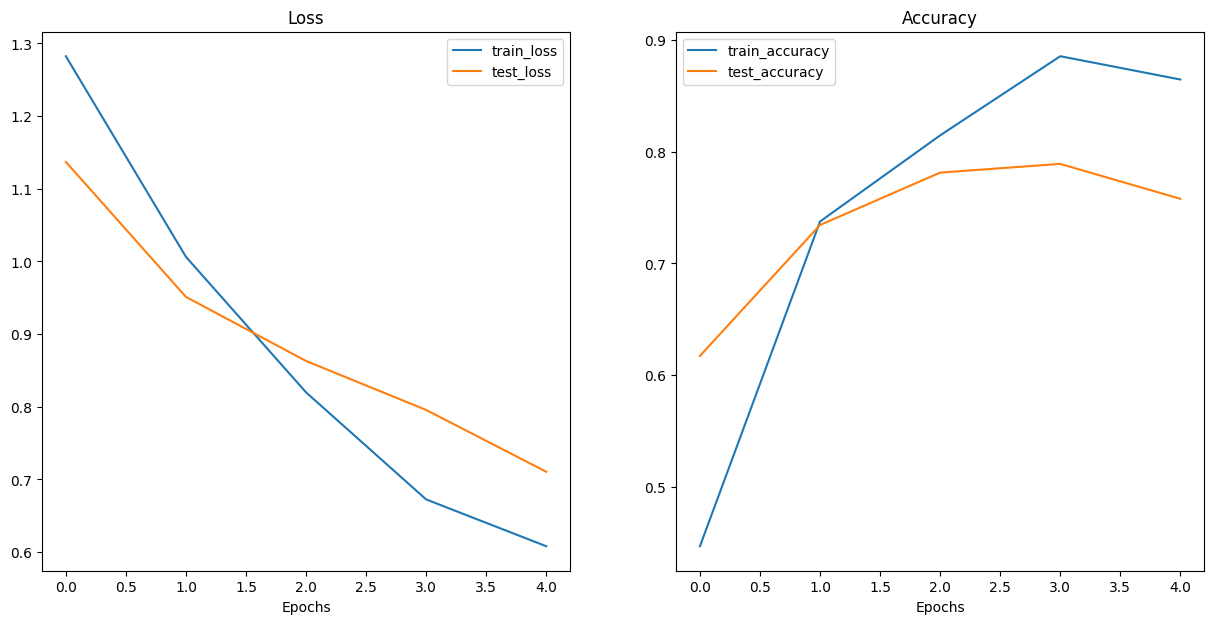

In [17]:
from helper_functions import plot_loss_curves
plot_loss_curves(results)


The loss curves displayed in the graph are quite impressive!

It is evident that the loss values for both the train and test datasets are decreasing, indicating that the model is learning effectively.

Additionally, the accuracy values are consistently improving, showing an upward trend. This indicates that the model's predictions are becoming more accurate as the training progresses.

# Confusion Matrix


step 1: Make predictions on the entire test dataset with the model

In [18]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="torch.utils.data.dataloader")

In [19]:
def make_preds_testdata(model: torch.nn.Module):

  # Make predictions on the entire test dataset
  test_preds = []
  model.eval()
  with torch.inference_mode():
    # Loop through the batches in the test dataloader
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      # Pass the data through the model
      test_logits = model(X)

      # Convert the pred logits to pred probs
      pred_probs = torch.softmax(test_logits, dim=1)

      # Convert the pred probs into pred labels
      pred_labels = torch.argmax(pred_probs, dim=1)

      # Add the pred labels to test preds list
      test_preds.append(pred_labels)

  # Concatenate the test preds and put them on the CPU
  test_preds = torch.cat(test_preds).cpu()
  return test_preds


In [20]:
 make_preds_testdata(model_V0)

tensor([1, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3,
        2, 2, 2, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3,
        1, 3, 3, 3])

step 2: Make a confusion matrix with the test preds and the truth labels

In [21]:
# Get the truth labels for test dataset
test_truth = torch.cat([y for X, y in test_dataloader])
test_truth

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3])

Step 3: Create a Confusion Matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.8 MB/s eta 0:00:00


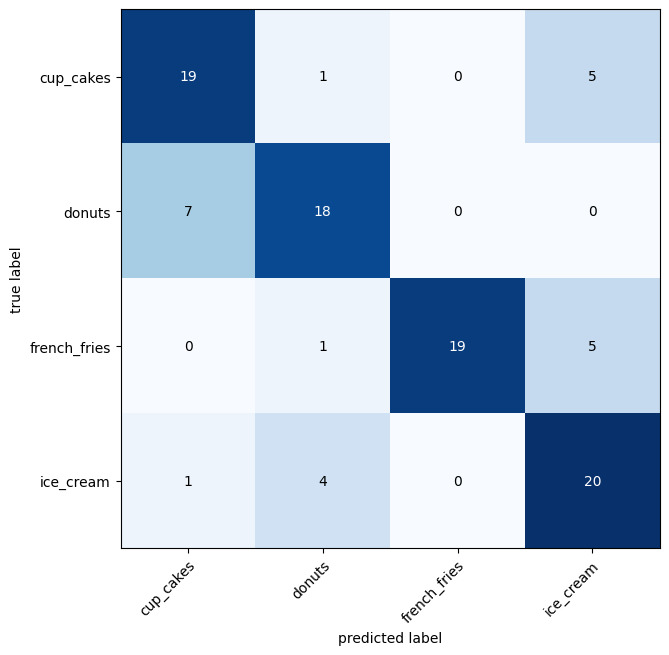

In [22]:
!pip install -q torchmetrics -U mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


# Setup confusion matrix instance
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds= make_preds_testdata(model_V0),
                         target=test_truth)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names,
    figsize=(10, 7)
)
     

The confusion matrix appears to be quite accurate, with most predictions aligning correctly. However, there were seven instances where donuts were mistakenly classified as cupcakes by the model.

# Evaluating Confusion Matrix result
Let's take a look at the seven instances where donuts were mistakenly classified as cupcakes by the model.

In [23]:
# Get all test data paths
from pathlib import Path
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_labels = [path.parent.stem for path in test_data_paths]

In [24]:
# Create a function to return a list of dictionaries with sample, label, prediction, pred prob
from tqdm.auto import tqdm
def pred_and_store(test_paths, model, transform, class_names, device):
  test_pred_list = []
  for path in tqdm(test_paths):
    # Create empty dict to store info for each sample
    pred_dict = {}

    # Get sample path
    pred_dict["image_path"] = path

    # Get class name
    class_name = path.parent.stem
    pred_dict["class_name"] = class_name

    # Get prediction and prediction probability
    from PIL import Image
    img = Image.open(path) # open image
    transformed_image = transform(img).unsqueeze(0) # transform image and add batch dimension
    model.eval()
    with torch.inference_mode():
      pred_logit = model(transformed_image.to(device))
      pred_prob = torch.softmax(pred_logit, dim=1)
      pred_label = torch.argmax(pred_prob, dim=1)
      pred_class = class_names[pred_label.cpu()]

      # Make sure things in the dictionary are back on the CPU 
      pred_dict["pred_prob"] = pred_prob.unsqueeze(0).max().cpu().item()
      pred_dict["pred_class"] = pred_class
  
    # Does the pred match the true label?
    pred_dict["correct"] = class_name == pred_class

    # print(pred_dict)
    # Add the dictionary to the list of preds
    test_pred_list.append(pred_dict)

  return test_pred_list

In [25]:
# Function Call
test_pred_dicts = pred_and_store(test_paths=test_data_paths,
                                 model=model_V0,
                                 transform=auto_transforms,
                                 class_names=class_names,
                                 device=device)

# test_pred_dicts[:2]

  0%|          | 0/100 [00:00<?, ?it/s]

**Turn the test_pred_dicts into a DataFrame**

In [26]:
import pandas as pd
test_pred_df = pd.DataFrame(test_pred_dicts)

In [27]:
# Sorting the dataframe
donuts_wrong_predict = test_pred_df[(test_pred_df['class_name'] == 'donuts') & (test_pred_df['pred_class'] == 'cup_cakes')]
donuts_wrong_predict

,image_path,class_name,pred_prob,pred_class,correct
55,data/my_fav_foods/test/donuts/2249919.jpg,donuts,0.502436,cup_cakes,False
61,data/my_fav_foods/test/donuts/2293386.jpg,donuts,0.453672,cup_cakes,False
62,data/my_fav_foods/test/donuts/1728148.jpg,donuts,0.449529,cup_cakes,False
64,data/my_fav_foods/test/donuts/1829382.jpg,donuts,0.657250,cup_cakes,False
66,data/my_fav_foods/test/donuts/1007399.jpg,donuts,0.611182,cup_cakes,False
71,data/my_fav_foods/test/donuts/1581488.jpg,donuts,0.316006,cup_cakes,False
73,data/my_fav_foods/test/donuts/3589422.jpg,donuts,0.365241,cup_cakes,False


**Visualization**

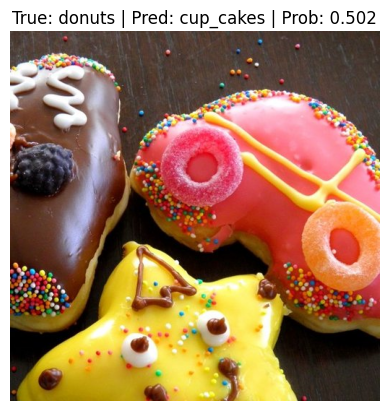

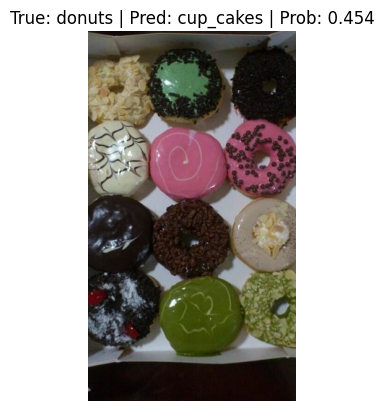

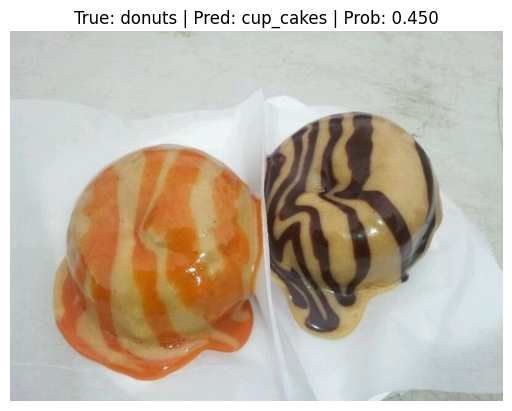

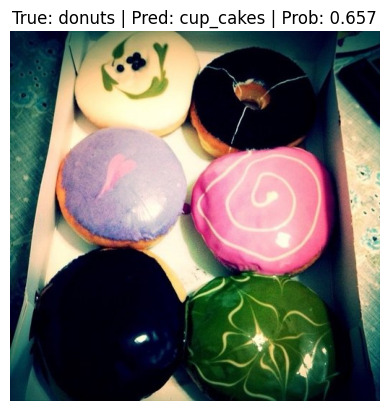

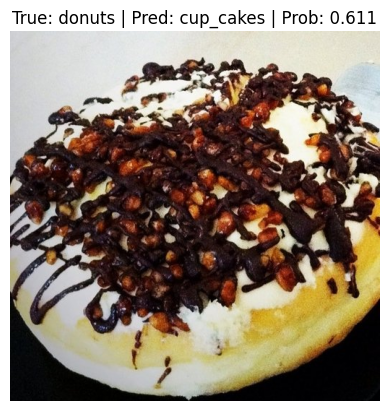

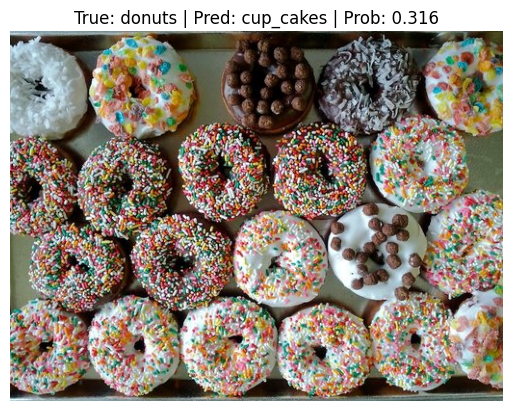

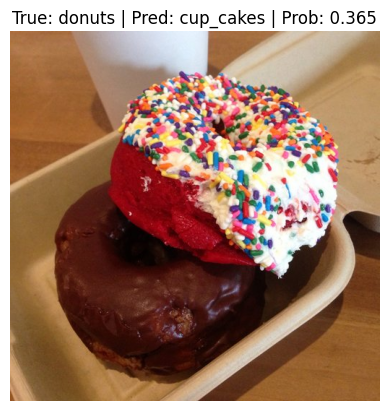

In [28]:
import torchvision
import matplotlib.pyplot as plt

for row in donuts_wrong_predict.iterrows():
  row = row[1]
  image_path = row[0]
  true_label = row[1]
  pred_prob = row[2]
  pred_class = row[3]
  # Plot the image and various details
  img = torchvision.io.read_image(str(image_path)) # get image as tensor
  plt.figure()
  plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in [height, width, color_channels]
  plt.title(f"True: {true_label} | Pred: {pred_class} | Prob: {pred_prob:.3f}")
  plt.axis(False);

In [29]:
results['train_acc'][-1], results['test_acc'][-1]

(0.8645833333333334, 0.7578125)

Our model_v0 demonstrates exceptional performance in classifying various food items. However, there are instances where even as humans, determining the correct label can be challenging. Take the fifth item in visualztion section, for example, where the truth label is a donut. It's difficult to confidently identify it as such. Nonetheless, the overall accuracy of our model in this task is truly outstanding.



---



---



# Make prediction in a custom image

--2023-06-09 05:27:47--  https://plus.unsplash.com/premium_photo-1673792686442-5339992b933a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y3VwY2FrZXxlbnwwfHwwfHx8MA%3D%3D&auto=format&fit=crop&w=500&q=60
Resolving plus.unsplash.com (plus.unsplash.com)... 146.75.78.208, 2a04:4e42:84::720
Connecting to plus.unsplash.com (plus.unsplash.com)|146.75.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30727 (30K) [image/jpeg]
Saving to: ‘cupcake101.jpg’

cupcake101.jpg      100%[===================>]  30.01K  --.-KB/s    in 0.003s  

2023-06-09 05:27:48 (10.8 MB/s) - ‘cupcake101.jpg’ saved [30727/30727]



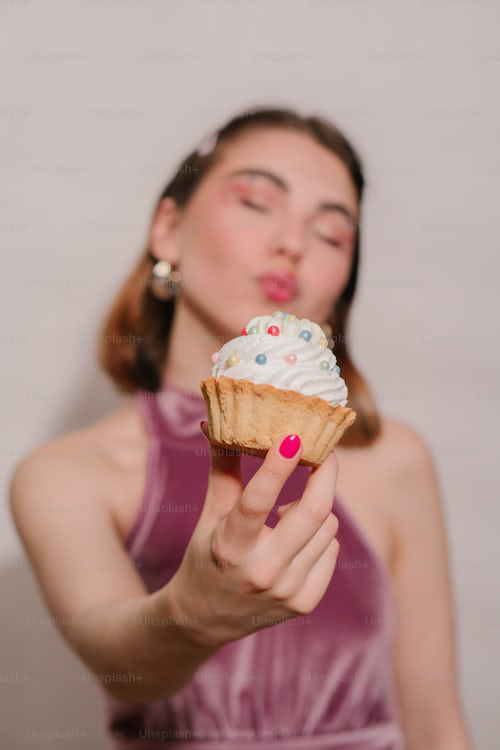

In [30]:
# get an Image fron the net
!wget -O cupcake101.jpg "https://plus.unsplash.com/premium_photo-1673792686442-5339992b933a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y3VwY2FrZXxlbnwwfHwwfHx8MA%3D%3D&auto=format&fit=crop&w=500&q=60"

# open the image
from PIL import Image
img =  Image.open("cupcake101.jpg") 
img

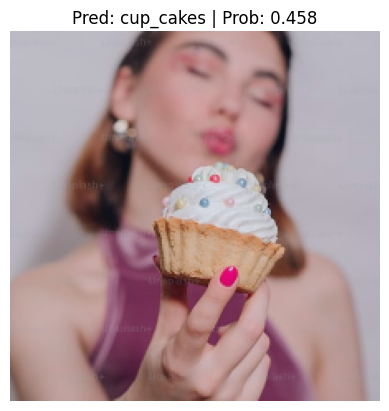

In [31]:
from helper_functions import pred_and_plot_image_v2

pred_and_plot_image_v2(model=model_V0,
                    image_path="cupcake101.jpg",
                    class_names=class_names,
                    transform=auto_transforms,
                    device=device)

The model has made a correct prediction on our custom image.

# Inception V3 Model

link: [Inception_V3](https://pytorch.org/vision/stable/models/generated/torchvision.models.inception_v3.html#torchvision.models.inception_v3)

In [58]:
weights_V2 = torchvision.models.Inception_V3_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
auto_transforms_V2 = weights_V2.transforms()

# Create training and testing DataLoaders as well as get a list of class names
import data_setup
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms_V2, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f4ea176aa70>,
 ['cup_cakes', 'donuts', 'french_fries', 'ice_cream'])

In [59]:
model_V2 = torchvision.models.inception_v3(weights=weights_V2).to(device)
# model_V2 = torchvision.models.inception_v3(pretrained=True).to(device)

In [60]:
model_V2.aux_logits = False

for parameter in model_V2.parameters():
    parameter.requires_grad = False

In [61]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

model_V2.fc = torch.nn.Sequential(
    # torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=2048, out_features=output_shape, bias=True)
).to(device)

In [62]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_V2.parameters(), lr=0.001)

In [63]:
  import engine
  from timeit import default_timer as timer 

  # Set the random seeds
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)

  # Start the timer
  start_time = timer()

  # Setup training and save the results
  results = engine.train(model=model_V2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=5,
                        device=device)

  # End the timer and print out how long it took
  end_time = timer()
  print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3743 | train_acc: 0.3042 | test_loss: 1.2665 | test_acc: 0.2734
Epoch: 2 | train_loss: 1.2144 | train_acc: 0.5073 | test_loss: 1.0359 | test_acc: 0.7656
Epoch: 3 | train_loss: 1.0139 | train_acc: 0.6396 | test_loss: 0.9594 | test_acc: 0.7812
Epoch: 4 | train_loss: 0.8660 | train_acc: 0.7719 | test_loss: 0.8814 | test_acc: 0.7891
Epoch: 5 | train_loss: 0.7907 | train_acc: 0.7896 | test_loss: 0.8370 | test_acc: 0.7891
[INFO] Total training time: 29.980 seconds


In [64]:
results['train_acc'][-1], results['test_acc'][-1]

(0.7895833333333333, 0.7890625)

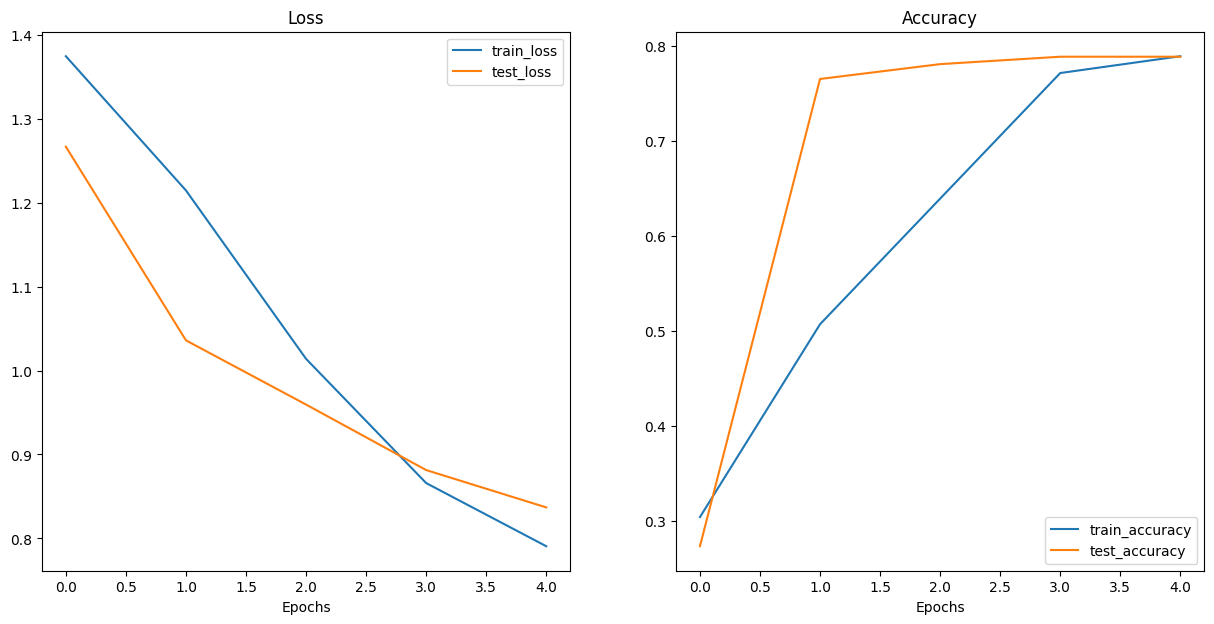

In [65]:
plot_loss_curves(results)

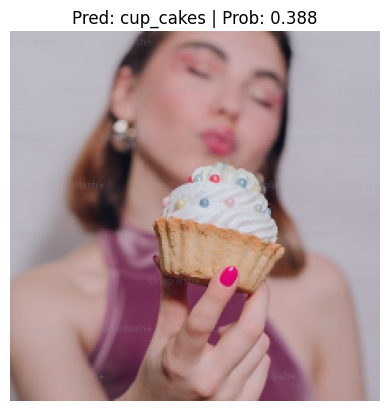

In [66]:
pred_and_plot_image_v2(model=model_V2,
                    image_path="cupcake101.jpg",
                    class_names=class_names,
                    transform=auto_transforms,
                    device=device)